In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%config InlineBackend.figure_format = 'retina'

import sys
sys.path.append('../..')
import clusterizer

%load_ext autoreload
%autoreload 2

Git root path found at: C:\dev\py\SCG-analyse
Using data path:        C:\dev\py\SCG-analyse\data\origineel


In [4]:
clusterizer.globals.available_circuits

[2145, 3010, 2979, 2980, 1512, 2063, 2870, 2806, 99999999]

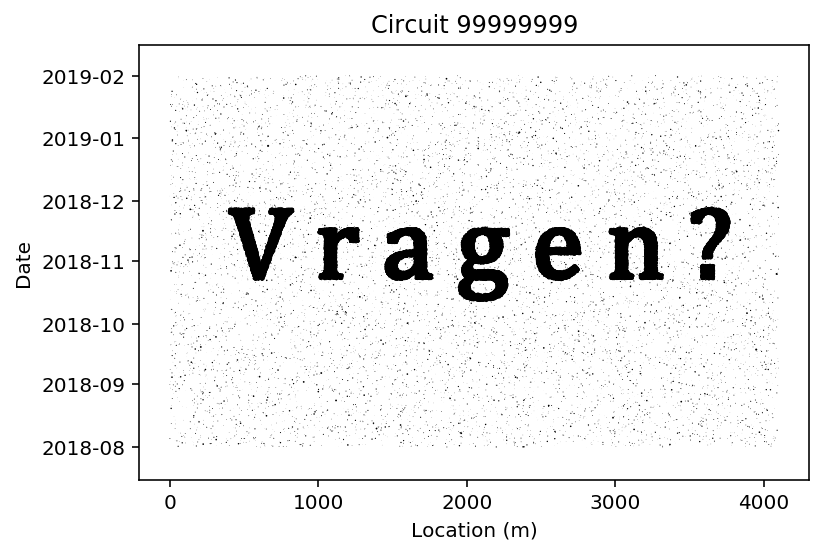

In [37]:
circuit = clusterizer.circuit.MergedCircuit(99999999)
circuit.build()

clusterizer.plot.draw_location_time_scatter(circuit)

{440m to 780m; Found by: Poisson 1D,
 1024m to 1156m; Found by: Poisson 1D,
 1200m to 1264m; Found by: Poisson 1D,
 1456m to 1732m; Found by: Poisson 1D,
 1952m to 2272m; Found by: Poisson 1D,
 2476m to 2756m; Found by: Poisson 1D,
 2980m to 3116m; Found by: Poisson 1D,
 3160m to 3280m; Found by: Poisson 1D,
 3520m to 3760m; Found by: Poisson 1D}

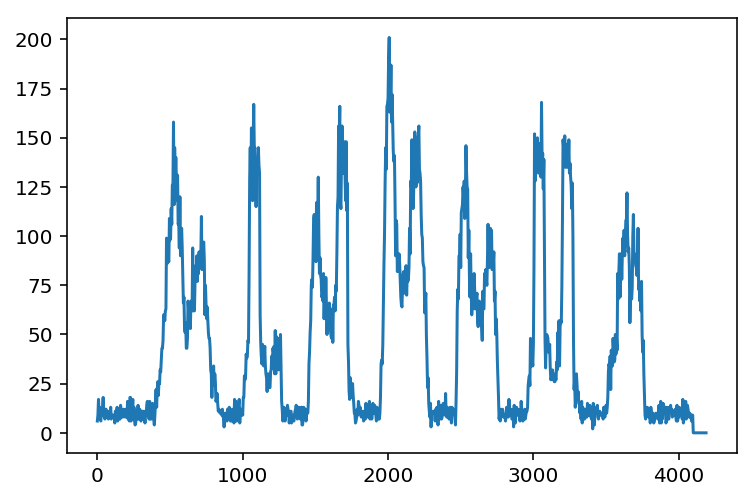

In [38]:
clusters, bins, bin_contents, nominal_pd_quantile_level, rate = clusterizer.algorithms.clusterize_poisson_1d(circuit, nominal_circuit_fraction=.05, return_intermediate_values=True)

plt.plot(bins[:-1], bin_contents)

clusters

In [43]:
modpoisson = lambda c: clusterizer.algorithms.clusterize_poisson(c, nominal_circuit_fraction=.05)

clusters = clusterizer.algorithms.clusterize_ensemble(circuit, [modpoisson, clusterizer.algorithms.clusterize_DBSCAN], add=True).get_clusters()
clusters

{1970m to 2260m; 2018-09-29T21:08:05.000000 until 2018-10-09T19:29:23.000000000; Found by: DBSCAN,
 3001m to 3086m; 2018-10-04T05:41:54.000000 until 2018-10-16T19:29:23.000000000; Found by: DBSCAN,
 2478m to 2749m; 2018-10-08T11:08:30.000000 until 2018-10-16T19:29:23.000000000; Found by: DBSCAN,
 1952m to 1970m; 2018-10-09T19:29:23.000000000 until 2018-11-20T19:29:23.000000000; Found by: Poisson 2D,
 1970m to 2260m; 2018-10-09T19:29:23.000000000 until 2018-11-20T19:29:23.000000000; Found by: Poisson 2D, DBSCAN,
 2260m to 2272m; 2018-10-09T19:29:23.000000000 until 2018-11-20T19:29:23.000000000; Found by: Poisson 2D,
 1460m to 1608m; 2018-10-10T09:29:44.000000 until 2018-10-16T19:29:23.000000000; Found by: DBSCAN,
 1039m to 1127m; 2018-10-10T23:09:00.000000 until 2018-10-16T19:29:23.000000000; Found by: DBSCAN,
 1608m to 1614m; 2018-10-16T19:29:23.000000000 until 2018-11-17T00:38:45.000000; Found by: Poisson 2D,
 1614m to 1729m; 2018-10-16T19:29:23.000000000 until 2018-11-17T00:38:45.000

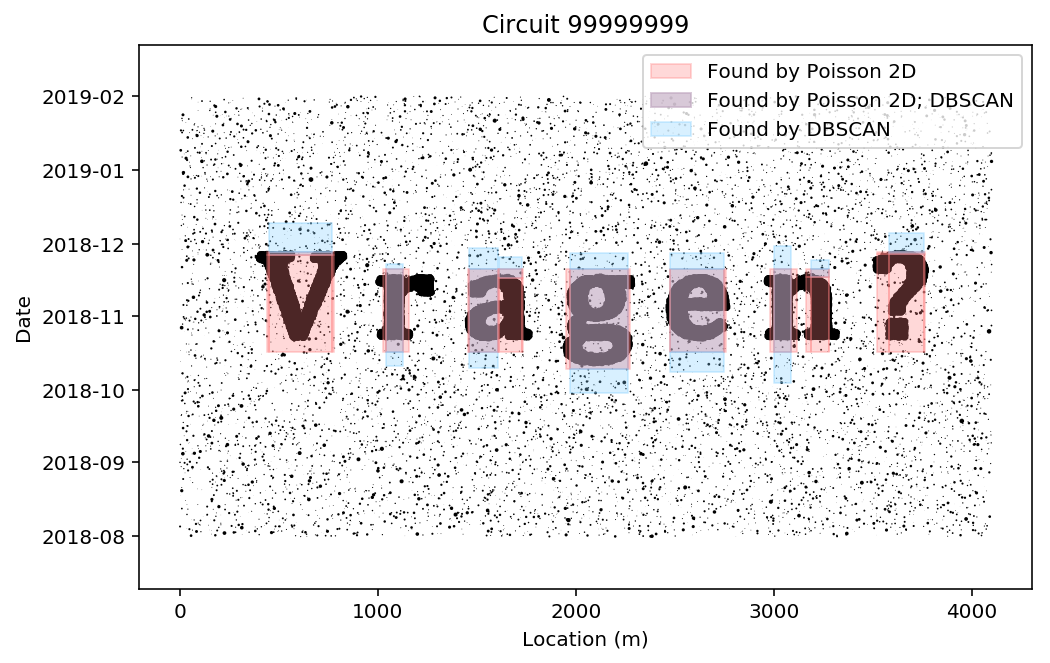

In [49]:
%matplotlib inline

# Maak een figuur met daarin één Axes-object
fig, ax = plt.subplots(figsize=(8,5))

clusterizer.plot.draw_location_time_scatter(circuit, dot_size_to_charge_ratio=1e3, ax=ax)
clusterizer.plot.overlay_cluster_collection(clusters, ax=ax)
clusterizer.plot.legend_without_duplicate_labels(ax=ax)

#ax.set_title("Zijn er nog")

# Opslaan:
clusterizer.plot.save_figure_for_google_slides("prank")
clusterizer.plot.save_figure_for_latex("prank")